# Laboratorio 4 
# Programando regresión multilineal

## Nicolás Echeverri Rojas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1=np.random.random(100)*4
x2=np.random.random(100)*5

y=2*x1+3*x2

### 1. gráfico de la distribución de  los puntos generados aleatoriamente

Text(0.5, 0.5, '$x_2$')

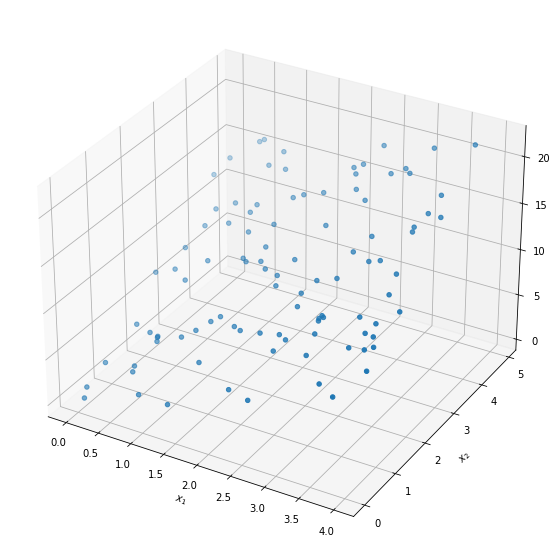

In [4]:
yv=2*x1+3*x2

fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x1, x2, y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
#ax.set_zlim(0,20)


In [5]:
def multilinealRegression(x1,x2,y, alpha,iteraciones):
    
    m=len(x1)
    ones=np.ones(m)
    
    X=np.vstack((ones,x1,x2))
    Theta=np.array( [1,6,8] )
        
    for i in range(iteraciones):
        JMatrix=np.matmul(Theta,X)-y

        JdevTheta0=1/m*sum(JMatrix*1)
        JdevTheta1=1/m*sum(JMatrix*x1)
        JdevTheta2=1/m*sum(JMatrix*x2)

        Jgrad=np.array([JdevTheta0,JdevTheta1,JdevTheta2])
        Theta=Theta-alpha*Jgrad
    
    return Theta

In [6]:
# Función inicial y=0+2*x1+3*x2

multilinealRegression(x1,x2,y, alpha=0.01,iteraciones=10000)

array([-1.63629641e-06,  2.00000034e+00,  3.00000031e+00])

Se observa que el algoritmo converge a los valores esperados

## Generalizando para un número n de características

In [7]:
def multilinealRegressionGeneralized(X_values,y, alpha,iteraciones):
    
    n=X_values.shape[0]
    m=X_values.shape[1]
    ones=np.ones(m)
    
    X=np.vstack((ones,X_values))
    Theta=np.random.randint(low=1, high=4, size=n+1)

    for i in range(iteraciones):
        JMatrix=np.matmul(Theta,X)-y
        
        Jgrad=1/m*np.matmul(JMatrix,np.transpose(X))
        Theta=Theta-alpha*Jgrad
    
    return Theta

In [8]:
x1=np.random.random(10)*4
x2=np.random.random(10)*5

y=2*x1+3*x2

X_values=np.vstack((x1,x2))
multilinealRegressionGeneralized(X_values,y, alpha=0.01,iteraciones=10000)

array([1.50434324e-05, 1.99999702e+00, 2.99999780e+00])

## Probando con más features

In [61]:
x1=np.random.random(5)*4
x2=np.random.random(5)*5
x3=np.random.random(5)*5


y=2*x1+3*x2+7*x3# +1.2*x4

X_values=np.vstack((x1,x2,x3))

multilinealRegressionGeneralized(X_values,y, alpha=0.01,iteraciones=100000)

array([1.27228591e-13, 2.00000000e+00, 3.00000000e+00, 7.00000000e+00])

Se observa que el algoritmo está encontrando los coeficientes con los que se generó los datos 

### Encontrando los valores de $\Theta$ usando  la Ecuación Normal

In [47]:
def normalEquation(X_values,y):

    m=X_values.shape[1]
    ones=np.ones(m)
    
    X=np.vstack((ones,X_values))
    X_t=np.transpose(X)
    
    X=np.matrix(X_t)
    Y=np.matrix(y)
    
    Theta=(( (X.T*X).I)*X.T )*Y.T
    return np.array(Theta).flatten()

In [54]:
x1=np.random.random(5)*4
x2=np.random.random(5)*5
x3=np.random.random(5)*5


y=0+2*x1+3*x2+7*x3# +1.2*x4

X_values=np.vstack((x1,x2,x3))

In [55]:
Theta=normalEquation(X_values=X_values,y=y)

In [56]:
Theta

array([-1.78523862e-13,  2.00000000e+00,  3.00000000e+00,  7.00000000e+00])

Se observa que el algoritmo está encontrando los coeficientes con los que se generó los datos 